In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import nltk
import acquire
import prepare
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize = (13, 7))
plt.style.use('seaborn-darkgrid')

1. Spam Data

    a. Load the spam data set.
    
    b.Create and explore bigrams for the spam data.Visualize them with a word cloud. How do they compare with the ham bigrams?
    
    c. Is there any overlap in the bigrams for the spam data and the ham data?
    
    d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
# acquire data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [5]:
# let's get some insights on word frequency by taking our words back apart
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [6]:
ham_freq.head()

im      449
get     314
go      273
ok      272
dont    257
dtype: int64

In [7]:
spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [8]:
# lets join these words together into a dataframe based 
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


visualization

ham vs spam count for 20 most common word

<AxesSubplot:>

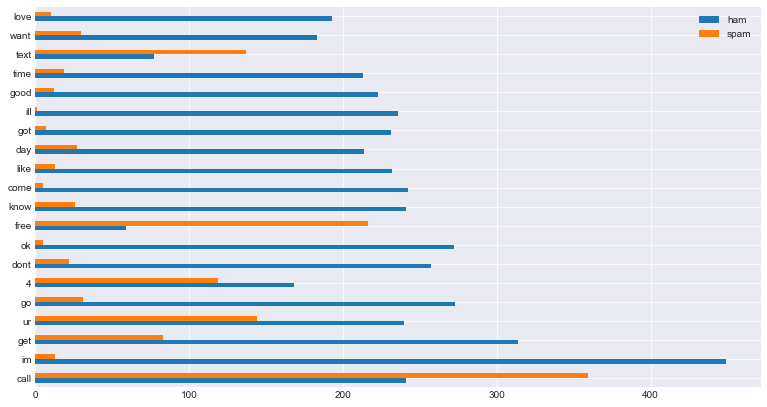

In [9]:
word_counts.sort_values(by = "all", ascending = False)[["ham","spam"]]\
.head(20).plot.barh()

Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

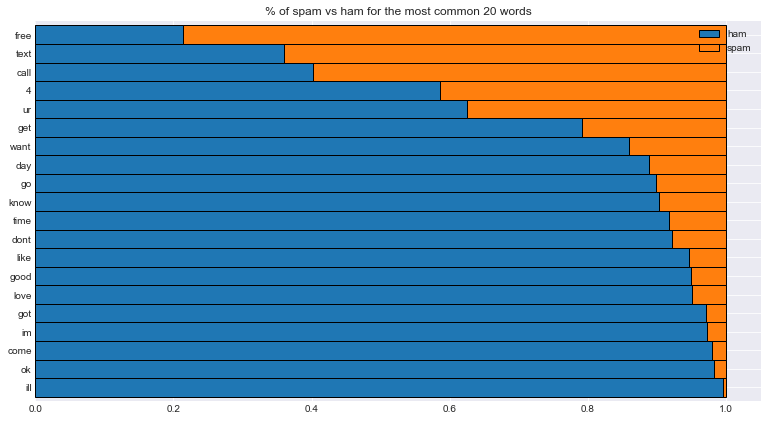

In [10]:
word_counts.sort_values("all", ascending = False)\
.head(20)\
.apply(lambda row:row/row["all"], axis = 1)\
.drop(columns = "all")\
.sort_values("spam")\
.plot.barh(stacked = True, width = 1, ec = "k", legend = True)
plt.title('% of spam vs ham for the most common 20 words')


biogram

In [11]:
# create bigrams for ham and spam words
ham_biogram = pd.Series(nltk.ngrams(ham_words,2)).value_counts().head(20)
spam_biogram = pd.Series(nltk.ngrams(spam_words,2)).value_counts().head(20)

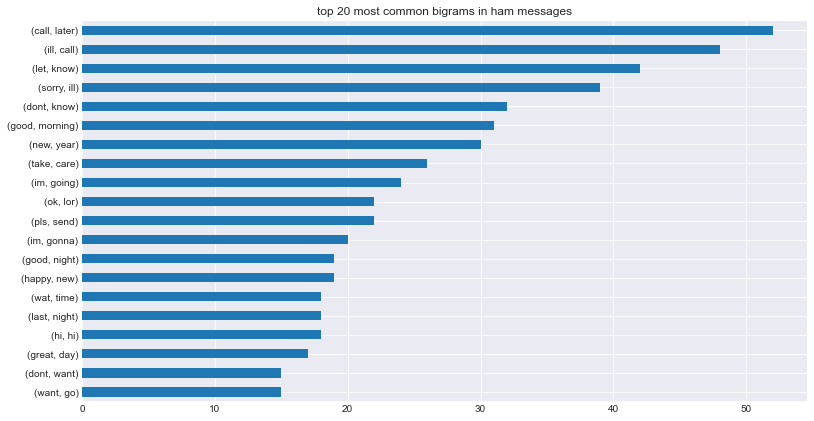

In [12]:
ham_biogram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common bigrams in ham messages')
plt.show()

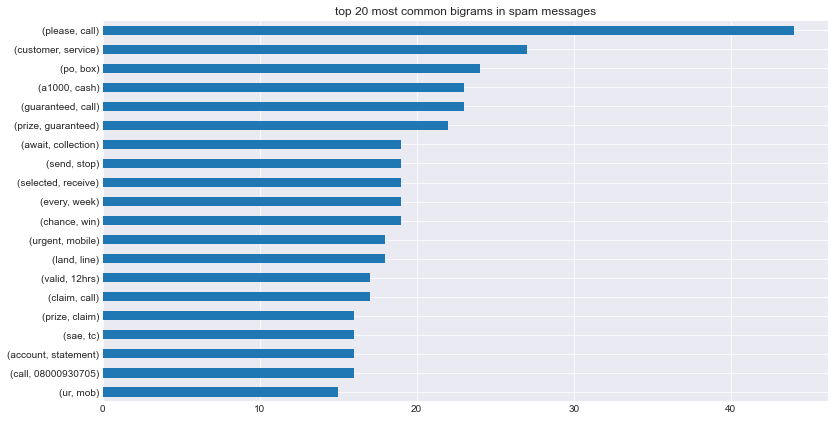

In [13]:
spam_biogram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common bigrams in spam messages')
plt.show()

Are there some bigrams that are common in both?

In [14]:
all_biogram = pd.Series(nltk.ngrams(all_words,2)).value_counts().head(20)

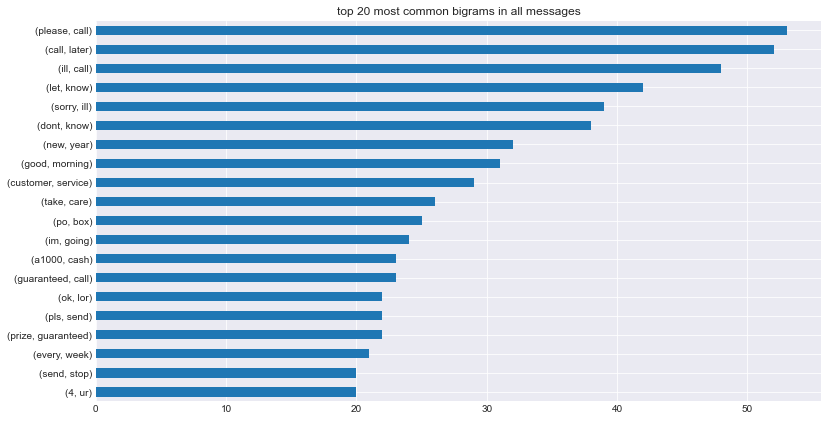

In [15]:
all_biogram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common bigrams in all messages')
plt.show()

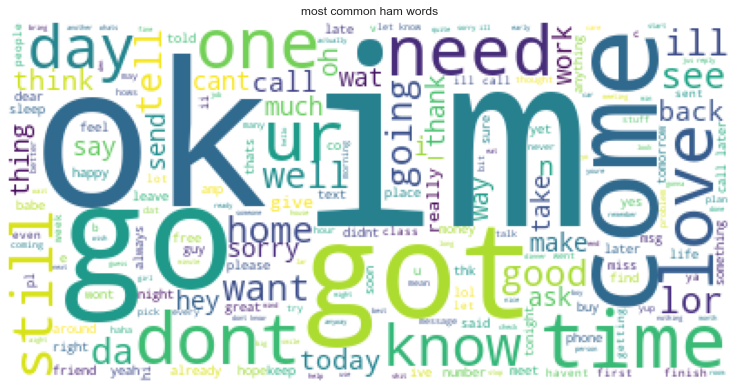

In [16]:
#word cloud for Ham words
img = WordCloud(background_color='white'
               ).generate(' '.join(ham_words))
plt.imshow(img)
plt.axis('off')
plt.title('most common ham words')
plt.show()

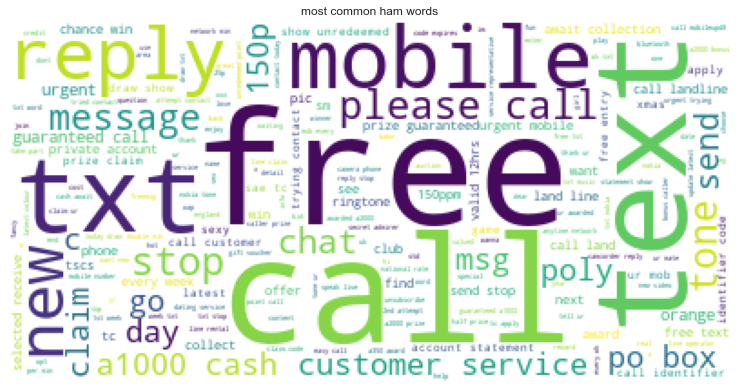

In [17]:
#word cloud for spam words
img = WordCloud(background_color='white'
               ).generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('most common ham words')
plt.show()

In [22]:
#make trigrams
ham_trigram = pd.Series(nltk.ngrams(ham_words,3)).value_counts().head(20)
spam_trigram = pd.Series(nltk.ngrams(spam_words,3)).value_counts().head(20)

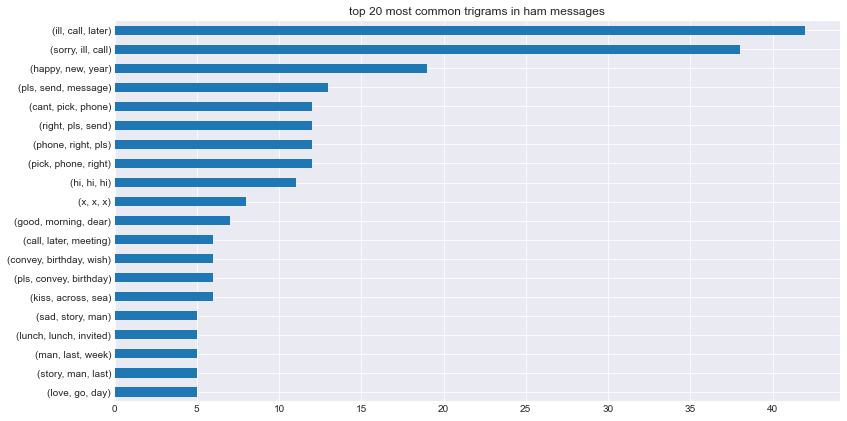

In [24]:
ham_trigram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common trigrams in ham messages')
plt.show()

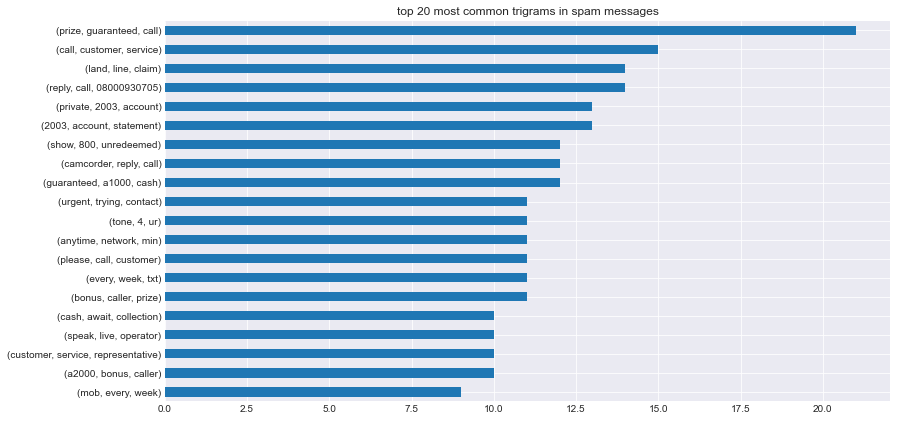

In [25]:
spam_trigram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common trigrams in spam messages')
plt.show()

### 2. Explore the blog articles using the techniques discussed in the exploration lesson

In [33]:
def clean_extra(string):
    'A simple function to cleanup text data'
    #lemmatize text
    wnl = nltk.stem.WordNetLemmatizer()
    #stating what stopwords are
    stopwords = nltk.corpus.stopwords.words('english') 
    #normlalizing string, encoding it to ascii for removal of nonascii,
    #then decoding to change byte object back to string
    string = (unicodedata.normalize('NFKD', string)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    #splitting the string into individual words
    words = re.sub(r'[^\w\s]', '', string).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [34]:
base_url = 'https://codeup.com/blog/'

In [31]:
codeup_df = acquire.get_blog_content(base_url)
codeup_df

,title,content
0,Coding Bootcamp or Computer Science Degree?,"For many people, deciding between a coding boo..."
1,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...
2,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...
3,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...
4,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio..."
5,What is Cloud Computing and AWS?,With many companies switching to cloud service...


In [45]:
#use clean extra function
title_words = clean(' '.join((codeup_df.title)))
content_words = clean( ' '.join((codeup_df.content)))

In [48]:
#convert to series and get value counts
title_freq = pd.Series(title_words).value_counts()
content_freq = pd.Series(content_words).value_counts()

In [51]:
# lets join these words together into a dataframe based 
blog_word_counts = pd.concat([title_freq, content_freq], axis=1
         ).fillna(0).astype(int)
blog_word_counts.columns = ['title','content']
blog_word_counts.head(10)

,title,content
diversity,2,4
inclusion,2,4
career,2,12
coding,1,3
winner,1,1
computing,1,4
cloud,1,19
tech,1,15
beginning,1,0
woman,1,9


In [53]:
#Most frequent word in content
blog_word_counts.sort_values('content', ascending=False).head(30)

,title,content
program,0,19
cloud,1,19
codeup,1,19
tech,1,15
student,0,14
career,2,12
service,0,10
aws,1,9
woman,1,9
organization,0,8


### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring